# Installation
```
pip install scikit-learn
pip install numpy as np
pip install numpy as pandas
```

In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import normalize
from sklearn.ensemble import AdaBoostClassifier as Ada
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

In [453]:
allData = pd.read_csv('napchc13.csv')
dataY = allData[['Treatment']].values
dataX = allData.drop(['Queen','Treatment'],axis=1)

In [454]:
learningRate = 10
weakLearners = 100


In [455]:
def matrixTreatment(treatmentG):
        lst = []
        for _ in range(len(treatmentG)):

            if treatmentG[_] == 'C':
                lst.append([0,0,0])
            elif treatmentG[_] == 'DP':
                lst.append([1,0,0])
            elif treatmentG[_] == 'IM':
                lst.append([0,1,0])
            elif treatmentG[_] == 'IMDP':
                lst.append([1,1,0])
            else:
                lst.append([0,0,1]) 
        return lst 

In [456]:


dataY = matrixTreatment(dataY)
trainX, testX, trainY, testY = train_test_split(dataX, dataY, train_size=.8,shuffle=True,random_state=1)
accurDP = []
accurIM = []
accurPYR = []
lR =[]
trainY = pd.DataFrame(trainY)
testY = pd.DataFrame(testY)


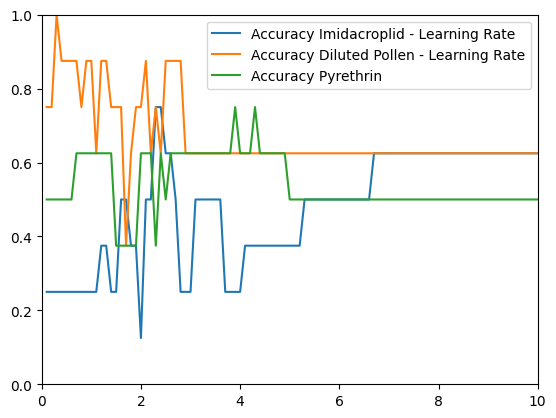

In [457]:
while learningRate >= .1:
    lR.append(learningRate)
    dpModel = Ada(learning_rate=learningRate, n_estimators=weakLearners, algorithm='SAMME')
    imModel = Ada(learning_rate=learningRate, n_estimators=weakLearners, algorithm='SAMME')
    pyrModel = Ada(learning_rate=learningRate, n_estimators=weakLearners, algorithm='SAMME') 
    dpModel.fit(trainX.values,trainY[0])
    imModel.fit(trainX.values,trainY[1])
    pyrModel.fit(trainX.values,trainY[2])

    dpPred = dpModel.predict(testX.values)
    imPred = imModel.predict(testX.values)
    pyrPred = pyrModel.predict(testX.values)
    
    accurDP.append(accuracy_score(dpPred,testY[0]))
    accurIM.append(accuracy_score(imPred,testY[0]))
    accurPYR.append(accuracy_score(pyrPred,testY[0]))
    learningRate -= .1 
plt.xlim(0,10)
plt.ylim(0,1)
plt.plot(lR,accurIM, label ="Accuracy Imidacroplid - Learning Rate")
plt.plot(lR,accurDP, label = 'Accuracy Diluted Pollen - Learning Rate')
plt.plot(lR,accurPYR, label = 'Accuracy Pyrethrin')
plt.legend()
plt.show()

# Learning Rate Evalution 

### Learning Objective 

Understand the influence of learning rate on aquiring optimal ideal accuracy prediction utilizing trivial approaches. 